In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%pwd

'/Users/sairoopesh/projects/petrol_price_prediction/research'

In [3]:
df = pd.read_csv('data/petrol-price-forecasting/train_data.csv')

In [4]:
df.shape

(813, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [6]:
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [7]:
df.isna().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [8]:
df.fillna(method='bfill', inplace=True)

In [9]:
df.isna().sum()

Date            0
Petrol (USD)    0
dtype: int64

In [10]:
df.describe()

,Petrol (USD)
count,813.000000
mean,110.277934
std,19.247401
min,74.210000
25%,94.410000
50%,112.370000
75%,128.550000
max,189.510000


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          813 non-null    datetime64[ns]
 1   Petrol (USD)  813 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


<Axes: xlabel='Date', ylabel='Petrol (USD)'>

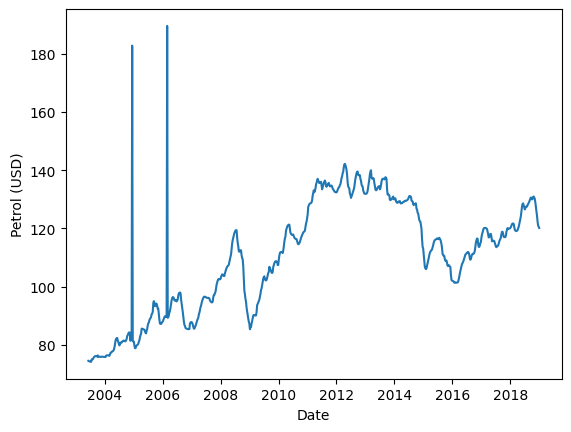

In [13]:
sns.lineplot(x='Date', y='Petrol (USD)', data=df)

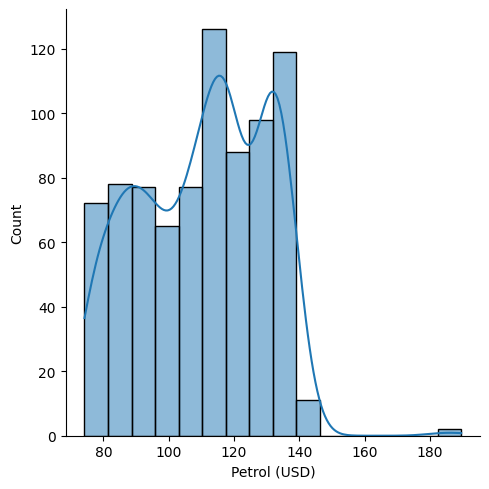

In [14]:
sns.displot(df['Petrol (USD)'],kde=True)

<Axes: xlabel='Petrol (USD)'>

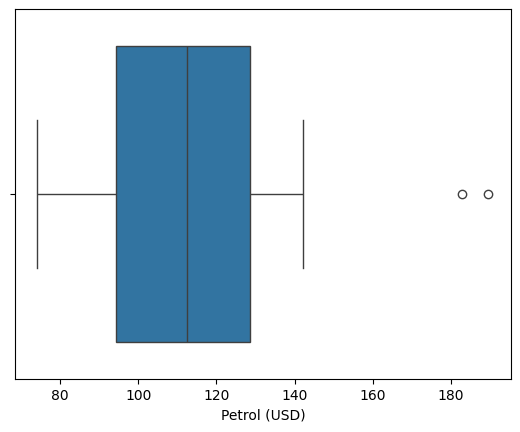

In [15]:
sns.boxplot(x='Petrol (USD)', data=df)

In [16]:
Q1 = df['Petrol (USD)'].quantile(0.25)
Q3 = df['Petrol (USD)'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
df = df[(df['Petrol (USD)'] > lower_bound) & (df['Petrol (USD)'] < upper_bound)]

<Axes: xlabel='Petrol (USD)'>

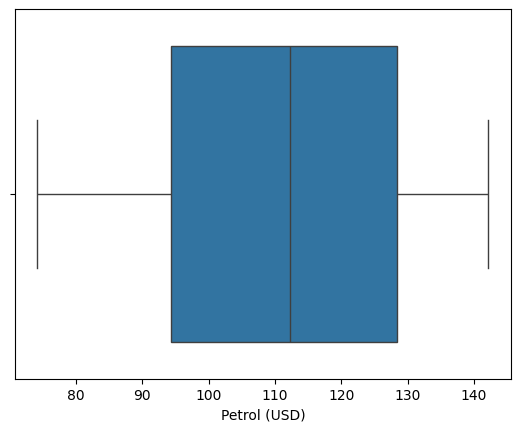

In [19]:
sns.boxplot(x='Petrol (USD)', data=df)

<Axes: xlabel='Date', ylabel='Petrol (USD)'>

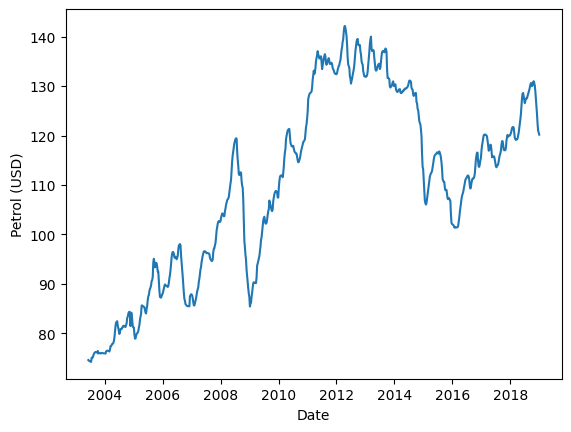

In [20]:
sns.lineplot(x='Date', y='Petrol (USD)', data=df)

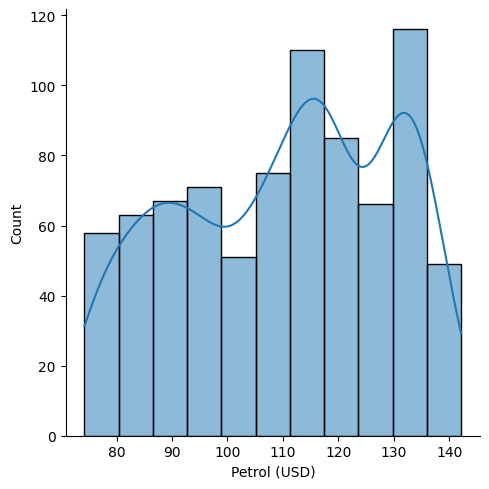

In [21]:
sns.displot(df['Petrol (USD)'],kde=True)

In [22]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

/Users/sairoopesh/projects/petrol_price_prediction/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
df = df.rename(columns={'Date':'ds', 'Petrol (USD)':'y'})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, 0 to 812
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      811 non-null    datetime64[ns]
 1   y       811 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.0 KB


In [25]:
model = Prophet(interval_width=0.9, daily_seasonality=True)
model.fit(df)

19:13:37 - cmdstanpy - INFO - Chain [1] start processing
19:13:38 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
df_test = pd.read_csv('data/petrol-price-forecasting/test_data.csv')

In [27]:
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [28]:
future = df_test[['Date']]
future.rename(columns={'Date':'ds'}, inplace=True)
future.head()
future['ds'] = pd.to_datetime(future['ds'])
future.head()

/var/folders/46/08x7cxl11vgcvv8g60pz4jr40000gn/T/ipykernel_53121/1118004123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future.rename(columns={'Date':'ds'}, inplace=True)
/var/folders/46/08x7cxl11vgcvv8g60pz4jr40000gn/T/ipykernel_53121/1118004123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['ds'] = pd.to_datetime(future['ds'])


,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05


In [29]:
forecast = model.predict(future)
predict=forecast[['ds', 'yhat']]
predict

,ds,yhat
0,2019-01-01,123.830196
1,2019-01-02,126.478322
2,2019-01-03,125.105059
3,2019-01-04,125.150560
4,2019-01-05,125.197551
5,2019-01-06,125.245519
6,2019-01-07,125.019533
7,2019-01-08,124.152000
8,2019-01-09,126.807237
9,2019-01-10,125.437742


In [30]:
plot_plotly(model, forecast)